<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/3%20-%20Pandas%20-%20Data%20Cleaning/walkthroughs/Introduction_to_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Introduction to EDA - Lab 3

%%html

<div>
<td> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

# Web scraping - Part 0
>The goal of this Walkthrough is to provide you with insights on exploratory data analysis throughout the use of a fun and interactive technique known as web scraping. During this laboratory, you will be provided with a broad overview of this technique as well as the major tools used in the process. You will also understand how data analysis can be conducted on real-time web data and hopefully see how this combination can be further applied to any other context. 


>In essence, web scraping consits in harvesting the content of a web page in order to process its information for further use. In our example, web scraping is used as a fun way to extract data that we will analyse afterwards. In most cases, this technique comes hand in hand with data cleaning and data analysis. For futher information on web scraping, click on the following [link](https://en.wikipedia.org/wiki/Web_scraping).

>**Note :** You can alse refer to this [tutorial](https://smac-group.github.io/ds/section-web-scraping.html#section-why-web-scraping-could-be-bad) at any time for additional informations on this topic from a course .


## Web scraping with Pandas

>Last week you were introduced with Pandas library and its DataFrame. Many different functions were presented to you for Dataframe manipulation. You should have noticed by now that this is a really usefull library when it comes to using tables. More over, one of the perks of using  Pandas is that you can diretly scrap HTML tables from the web... Lets dive into it.


> The main function we are going to be using is `read_html`, it allows you the directly put the data of webpage table into a DataFrame. For more information, just click on this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html). 

>For example, imagine we wanted to demonstrate the importance of the reserch department for the future of a company, we would have at some point to provide evidences for such statment. To that end, lets get the [top 50 companies](https://en.wikipedia.org/wiki/List_of_companies_by_research_and_development_spending) with the highest research and development expenses in 2018.

In [ ]:
import pandas as pd

In [ ]:
scraped_list=pd.read_html('https://en.wikipedia.org/wiki/List_of_companies_by_research_and_development_spending')
print("scraped tables " , len(scraped_list))





scraped tables  5


 The `read_html` function scraps any table from the webpage of interest as long as it has the right format. To display ther to top 5 companies, we have to specify with the right index. 

In [ ]:
scraped_list[2].head()

,Rank,Company,Country,Sector,Expenditures on R&D (billions of US$)
0,1,Volkswagen Group,Germany,Automotive,13.5
1,2,Samsung,South Korea,Computing and Electronics,13.4
2,3,Intel,United States,Computing and Electronics,10.6
3,4,Microsoft,United States,Software and Internet,10.4
4,5,Roche Holding,Switzerland,Health Care,10.0


## Web Scraping libraries

In order to get the data from the Web with Python, we will require during the course of this lab to use the follwing two essential libraries:

*  Requests (HTTP): retreives the web pages (html) to parse.

*  Beautiful Soup (HTML Parsing): parses the html.

Thanks to google colab, no specific environmental installation is needed to work on this lab. We can directly import the needed libraries. 
Moreover, last week you were introduced with a very important library when it comes to EDA known as [Pandas](https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html). Dataframes and the allowed manipulations come in very handy for the analysis we shall conduct on the newly fetched Data. Therefore, we will continue using this library throughout this lab as well. If you feel like you are still not at ease with Pandas basic concepts, please refer to the previous documentation or ask one of the TAs. 


In [ ]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re 


## Retreiving the Data


>In order to get started with web scraping we must first make a [request](https://requests.readthedocs.io/en/master/user/quickstart/). In simple words, we will ask the server hosting the webpage we are interested in for its content.

> In this laboratory, we will use the [Boat24.ch](https://www.boot24.ch/chde/motorboote/furtif-28-modele-unique/detail/463101/) by specifying its URL as parameter to the ``requests.get`` method. 

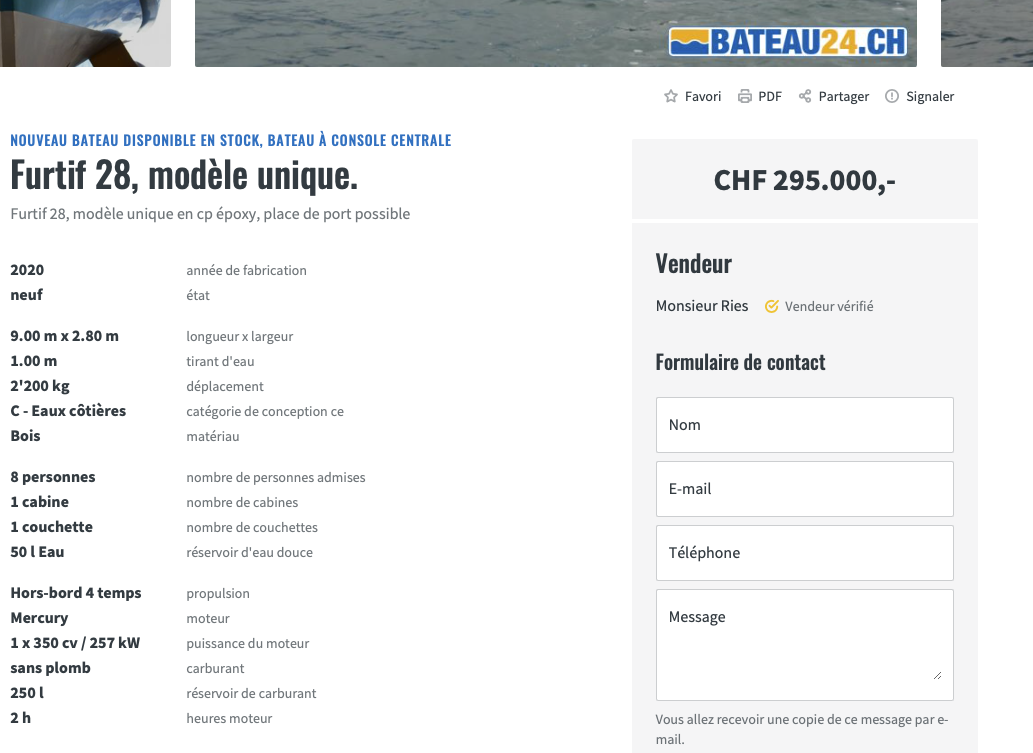

> We can check the status of our request using the library method ``status_code``. You can find more on the HTTP status code on this [link](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes). A code of **200** means the HTTP request was successfuly completed. On the other hand, the response header display metadata aboug the request itself. You can see for yourself the details of the header running the next cell. 



In [ ]:
# Make the request
r = requests.get('https://www.bateau24.ch/chfr/bateauxamoteur/furtif-28-modele-unique/detail/463101/')
# Response content
print('Response status code: {0}\n'.format(r.status_code))
print('Response headers: {0}\n'.format(r.headers))


Response status code: 200

Response headers: {'Date': 'Sat, 06 Mar 2021 20:17:37 GMT', 'Server': 'Apache', 'Expires': '0', 'Cache-Control': 'private, post-check=0, pre-check=0, max-age=0', 'Pragma': 'no-cache', 'X-Frame-Options': 'deny', 'Set-Cookie': 'domaincheck=1; expires=Sun, 06-Mar-2022 20:17:37 GMT; Max-Age=31536000; path=/; domain=.bateau24.ch, lan=chfr; expires=Sun, 06-Mar-2022 20:17:37 GMT; Max-Age=31536000; path=/; domain=.bateau24.ch, data=a%3A1%3A%7Bs%3A3%3A%22cat%22%3Ba%3A1%3A%7Bi%3A2%3Bi%3A1%3B%7D%7D; expires=Sun, 06-Mar-2022 20:17:37 GMT; Max-Age=31536000; path=/; domain=.bateau24.ch', 'Upgrade': 'h2', 'Connection': 'Upgrade, Keep-Alive', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Content-Length': '11996', 'Keep-Alive': 'timeout=4, max=256', 'Content-Type': 'text/html; charset=utf-8'}



**Note :** Requesting data from a website is not always straight forward. There can be some restrictions made by the server hosting the page regarding the request origin, content or number. As such, you should always pay attention to the request policy of a website before scraping it. In our case, here it is:  [link](https://www.boat24.ch/robots.txt)


Now, lets see the raw content of our request. The body of the response here will be in HTML since we are asking for a webpage. Different format such as  JSON or XML could also be imagined for web services.

In [ ]:
print('Response body: {0}'.format(r.text)[:1000])


Response body: <!doctype html>
<html class="no-js" lang="fr" data-lan="chfr">
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<title>Furtif 28, modèle unique., 2020, 2h, CHF 295.000,- | bateau24.ch</title>
<meta name="keywords" content="furtif 28, mod&egrave;le unique.,bateau &agrave; console centrale,bateau &agrave; moteur,nouveau bateau disponible en stock,acheter" />
<meta name="description" content="Furtif 28, mod&egrave;le unique. acheter - Ann&eacute;e de fabrication: 2020, Longueur: 9.00 m, Largeur: 2.80 m - Suivez ce lien pour plus de details, photos, informations et coordonnées : bateau24.ch (ID: 463101)" />
<meta name="revisit-after" content="1 days" />
<meta name="page-topic" content="Bateaux d'occasion, Bateaux" />
<meta name="page-type" content="Annonces, Petites annonces" />
<meta name="audience" content="all" />
<meta name="publisher" content="bateau24.ch" />
<meta name="copyright" content="bateau24.ch" />
<meta name="distribution" con

## Parsing the Data

Now as you can see, the HTTP response's body as it is, is hardly usable. Therefore, we rely on BeautifulSoup to parse the content to for further processings. Thus, we specify we need the html.parser. For more information, you can click [here.](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser)

BeatifulSoup, thanks to parsing the content, will allow us to conduct a series of different operations and commands that you will be discovering in the remaining part of this lab. Note that this library can be very powerfull and complete when it comes to parsing and manipulations, this overview is not meant to display all possible features offered by BeautifulSoup.


In [ ]:
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')


For instance, you can very easily get the title of the page using ``soup.title``.

In [ ]:
soup.title


<title>Furtif 28, modèle unique., 2020, 2h, CHF 295.000,- | bateau24.ch</title>

Yet, this is stil in HTML format, therefore using the ``.string`` allows for a more conventional layout.

In [ ]:
soup.title.string


'Furtif 28, modèle unique., 2020, 2h, CHF 295.000,- | bateau24.ch'

To go further with this laboratory and with Data retreival after parsing, some html notions are required. In essence, you should get acquainted with concepts like **HTML tags**. Several functions and manipulations allowed by BeautifulSoup rely on the different tags (headers,divisions, paragraphs, classes, ids etc..) to retreive the data they contain. You can find more on HTML tags [here](https://www.w3schools.com/html/html_elements.asp).

**Important** : All the manipulations that are performed bellow rely on a study of the HTML body of the repsonse. As it is specific to the website, it is fundamental to understand how to retreive the information and how where to get it from.  

In the next cell, we use the "`a`" tag as it is generally used for website links embedding (combined with ``href``). 

``soup.find`` and ``soup.find_all`` will be extensively in this lab to navigate the data structure, please do not hesitate to refere to the correpsonding  [documentation](https://https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for more information.


In [ ]:
links = soup.find_all('a')
print('The webpage cointains {0} links...'.format(len(links)))

The webpage cointains 141 links...


Analysis of the body can also allow us to easily retreive the purchase price. 

In [ ]:
price = soup.find_all('span',class_="list__value list__value--large")
price[0].text

'CHF 295.000,-'

Another usefull concept of html on wich BeautifulSoup relies is the notion of children. In fact, in HTML, tags are often assembled as a serie of containers each containg other tags. It is typical of a documented object model structure, you can find more clicking on this link : [DOM](https://www.w3schools.com/whatis/whatis_htmldom.asp).

Inspecting the page and using this notion led to the following commands to retreive the advertisment metadata. 

In [ ]:
t=soup.find("ul",class_="list list--space-8")

for child in t.children:
    print(child.text)

Identifiant: 463101
Publiée le: 08.02.2021
Nombre de vues depuis 7 jours: 544
Dans les favoris: de 1 personnes


Similarly, you can also retreive and display articles with their links worth consulting as they are similar to the boat we seem to be interested in. 

In [ ]:
t = soup.find_all("div", class_="blurb__link-area js-link")
for link in t:
    link_ = link.findAll('a', attrs={'href': re.compile("^https://")})
    print( "Item : {0}, Link : {1}".format( link_[0].text,link_[0].get('href') ))
        

Item : Chris Craft Catalina 30, Link : https://www.bateau24.ch/chfr/bateauxamoteur/chris-craft/chris-craft-catalina-30/detail/463495/
Item : De Antonio Yachts D34 Cruiser, Link : https://www.bateau24.ch/chfr/bateauxamoteur/de-antonio-yachts/de-antonio-yachts-d34-cruiser/detail/435166/
Item : Nuova Jolly Prince 38 CC, Link : https://www.bateau24.ch/chfr/bateauxamoteur/nuova-jolly/nuova-jolly-prince-38-cc/detail/463424/
Item : De Antonio Yachts D28 Open, Link : https://www.bateau24.ch/chfr/bateauxamoteur/de-antonio-yachts/de-antonio-yachts-d28-open/detail/330366/


Now, we are interesting in getting the description for our boat, to that end, we first retreived the according section in the page. 

In [ ]:
informations = soup.find_all("ul",class_="list l-mt-16")
informations[:2]


[<ul class="list l-mt-16">
 <li><span class="list__value">9.00 m x 2.80 m</span><span class="list__key">longueur x largeur</span></li>
 <li><span class="list__value">1.00 m</span><span class="list__key">tirant d'eau</span></li>
 <li><span class="list__value">2'200 kg</span><span class="list__key">déplacement</span></li>
 <li><span class="list__value">C - Eaux côtières</span><span class="list__key">catégorie de conception ce</span></li>
 <li><span class="list__value">Bois</span><span class="list__key">matériau</span></li>
 </ul>, <ul class="list l-mt-16">
 <li><span class="list__value">8 personnes</span><span class="list__key">nombre de personnes admises</span></li>
 <li><span class="list__value">1 cabine</span><span class="list__key">nombre de cabines</span></li>
 <li><span class="list__value">1 couchette</span><span class="list__key">nombre de couchettes</span></li>
 <li><span class="list__value">50 l Eau</span><span class="list__key">réservoir d'eau douce</span></li>
 </ul>]

Each part can be separatly processed. We can choose to view the first 5 characteristics. 

In [ ]:
[description,description2,description3]= informations[0],informations[1],informations[2]
description

<ul class="list l-mt-16">
<li><span class="list__value">9.00 m x 2.80 m</span><span class="list__key">longueur x largeur</span></li>
<li><span class="list__value">1.00 m</span><span class="list__key">tirant d'eau</span></li>
<li><span class="list__value">2'200 kg</span><span class="list__key">déplacement</span></li>
<li><span class="list__value">C - Eaux côtières</span><span class="list__key">catégorie de conception ce</span></li>
<li><span class="list__value">Bois</span><span class="list__key">matériau</span></li>
</ul>

In [ ]:
list__value =description.find_all("span", class_="list__value")
list__key =description.find_all("span", class_="list__key")
  

In [ ]:
list__value

[<span class="list__value">9.00 m x 2.80 m</span>,
 <span class="list__value">1.00 m</span>,
 <span class="list__value">2'200 kg</span>,
 <span class="list__value">C - Eaux côtières</span>,
 <span class="list__value">Bois</span>]

Here comes Pandas and its Dataframes. We put the information in a two column Dataframe that could be further used. 

In [ ]:

specs = pd.DataFrame(data={
     'list__key': list__key,'list__value': list__value})

In [ ]:
specs

,list__key,list__value
0,[longueur x largeur],[9.00 m x 2.80 m]
1,[tirant d'eau],[1.00 m]
2,[déplacement],[2'200 kg]
3,[catégorie de conception ce],[C - Eaux côtières]
4,[matériau],[Bois]


For processing purposes, we get rid of the braquets, it is trickier than it looks as the dtype of the dataframe is not ``string``. You can investigate the innerworkings of this command to feel more comfertable with the output. 

In [ ]:
specs.list__key=specs.list__key.apply(lambda x: re.search('>(.*)<',str(x)).group(1) )
specs.list__value=specs.list__value.apply(lambda x: re.search('>(.*)<',str(x)).group(1) )


In [ ]:
specs

,list__key,list__value
0,longueur x largeur,9.00 m x 2.80 m
1,tirant d'eau,1.00 m
2,déplacement,2'200 kg
3,catégorie de conception ce,C - Eaux côtières
4,matériau,Bois


In [ ]:
list__value =description2.find("span", class_="list__value")
list__key =description2.find_all("span", class_="list__key")
specs2 = pd.DataFrame(data={'list__value': list__value,
     'list__key': list__key})

In [ ]:
list__value =description3.find("span", class_="list__value")
list__key =description3.find_all("span", class_="list__key")
specs3 = pd.DataFrame(data={'list__value': list__value,
     'list__key': list__key})

In [ ]:
concatenated = pd.concat([specs,specs2,specs3])

concatenated

,list__key,list__value
0,longueur x largeur,9.00 m x 2.80 m
1,tirant d'eau,1.00 m
2,déplacement,2'200 kg
3,catégorie de conception ce,C - Eaux côtières
4,matériau,Bois
0,[nombre de personnes admises],8 personnes
1,[nombre de cabines],8 personnes
2,[nombre de couchettes],8 personnes
3,[réservoir d'eau douce],8 personnes
0,[propulsion],Hors-bord 4 temps


**Advanced**

Now, we use a different approach to get all the characteristics at once. Yet, there is one odd piece of Data in our Dataframe, can you notice it ? 

In [ ]:

list__value =soup.find_all("span", class_="list__value")
list__key =soup.find_all("span", class_="list__key")
furn = pd.DataFrame(data={'list__value': list__value,
     'list__key': list__key})
furn.list__value=furn.list__value.apply(lambda x: re.search('>(.*)<',str(x)).group(1) )
furn.list__key=furn.list__key.apply(lambda x: re.search('>(.*)<',str(x)).group(1) )

In [ ]:
furn.head()

,list__value,list__key
0,"CHF 295.000,-",
1,2020,année de fabrication
2,neuf,état
3,9.00 m x 2.80 m,longueur x largeur
4,1.00 m,tirant d'eau


In [ ]:
furn[1:]

,list__value,list__key
1,2020,année de fabrication
2,neuf,état
3,9.00 m x 2.80 m,longueur x largeur
4,1.00 m,tirant d'eau
5,2'200 kg,déplacement
6,C - Eaux côtières,catégorie de conception ce
7,Bois,matériau
8,8 personnes,nombre de personnes admises
9,1 cabine,nombre de cabines
10,1 couchette,nombre de couchettes


## Scrapping exercise 

Now, we want you to exercise your scrapping skills to rapidly retreive [the list of countries by unemployment rate.]('https://en.wikipedia.org/wiki/List_of_countries_by_unemployment_rate'). 

Result should look this way : 
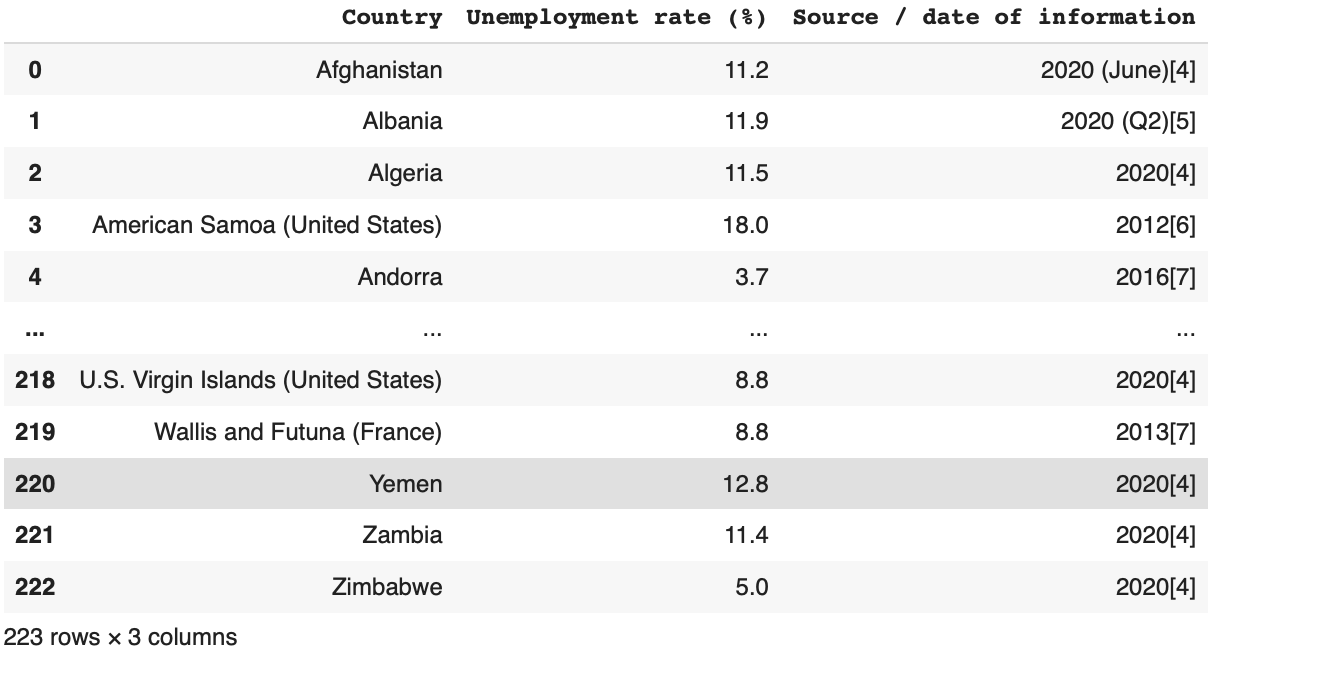

In [ ]:
#Your code Here 